In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf
import cv2

import zipfile
from keras.optimizers import RMSprop
import os
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Model
import warnings
warnings.filterwarnings('ignore')

In [122]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [126]:
print("Train Shape : ",train.shape)
print("Train Shape : ",test.shape)

Train Shape :  (891, 12)
Train Shape :  (418, 11)


In [127]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [129]:
mean_age = train.Age.mean()
train.Age.replace(np.nan, mean_age, inplace = True)
train.Age.isnull().sum()

0

In [130]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [131]:
print('Survived : ', train.Survived.unique())
print('Pclass   : ', train.Pclass.unique())
print('Gender   : ', train.Sex.unique())
print('Embarked : ', train.Embarked.dropna().unique())

Survived :  [0 1]
Pclass   :  [3 1 2]
Gender   :  ['male' 'female']
Embarked :  ['S' 'C' 'Q']


In [132]:
train.duplicated().sum()

0

In [133]:
gender = train.Sex.value_counts()
gender

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

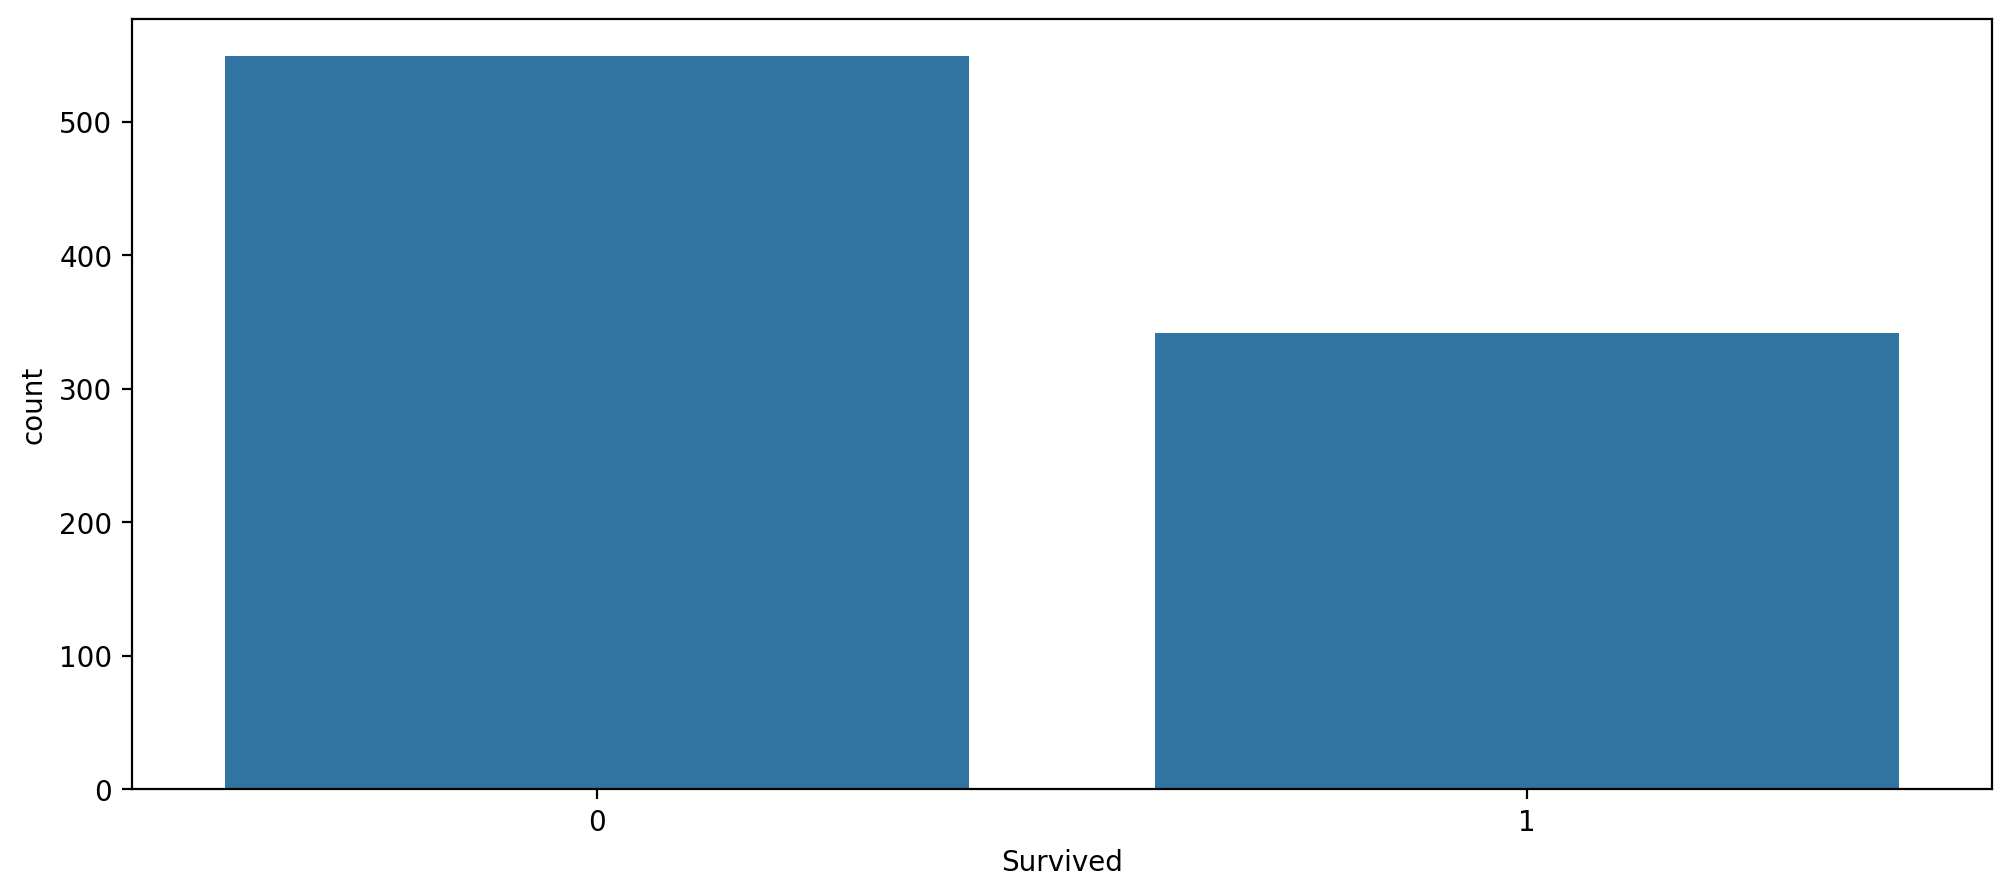

In [134]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot( data = train,x = 'Survived')

<Axes: xlabel='Sex', ylabel='count'>

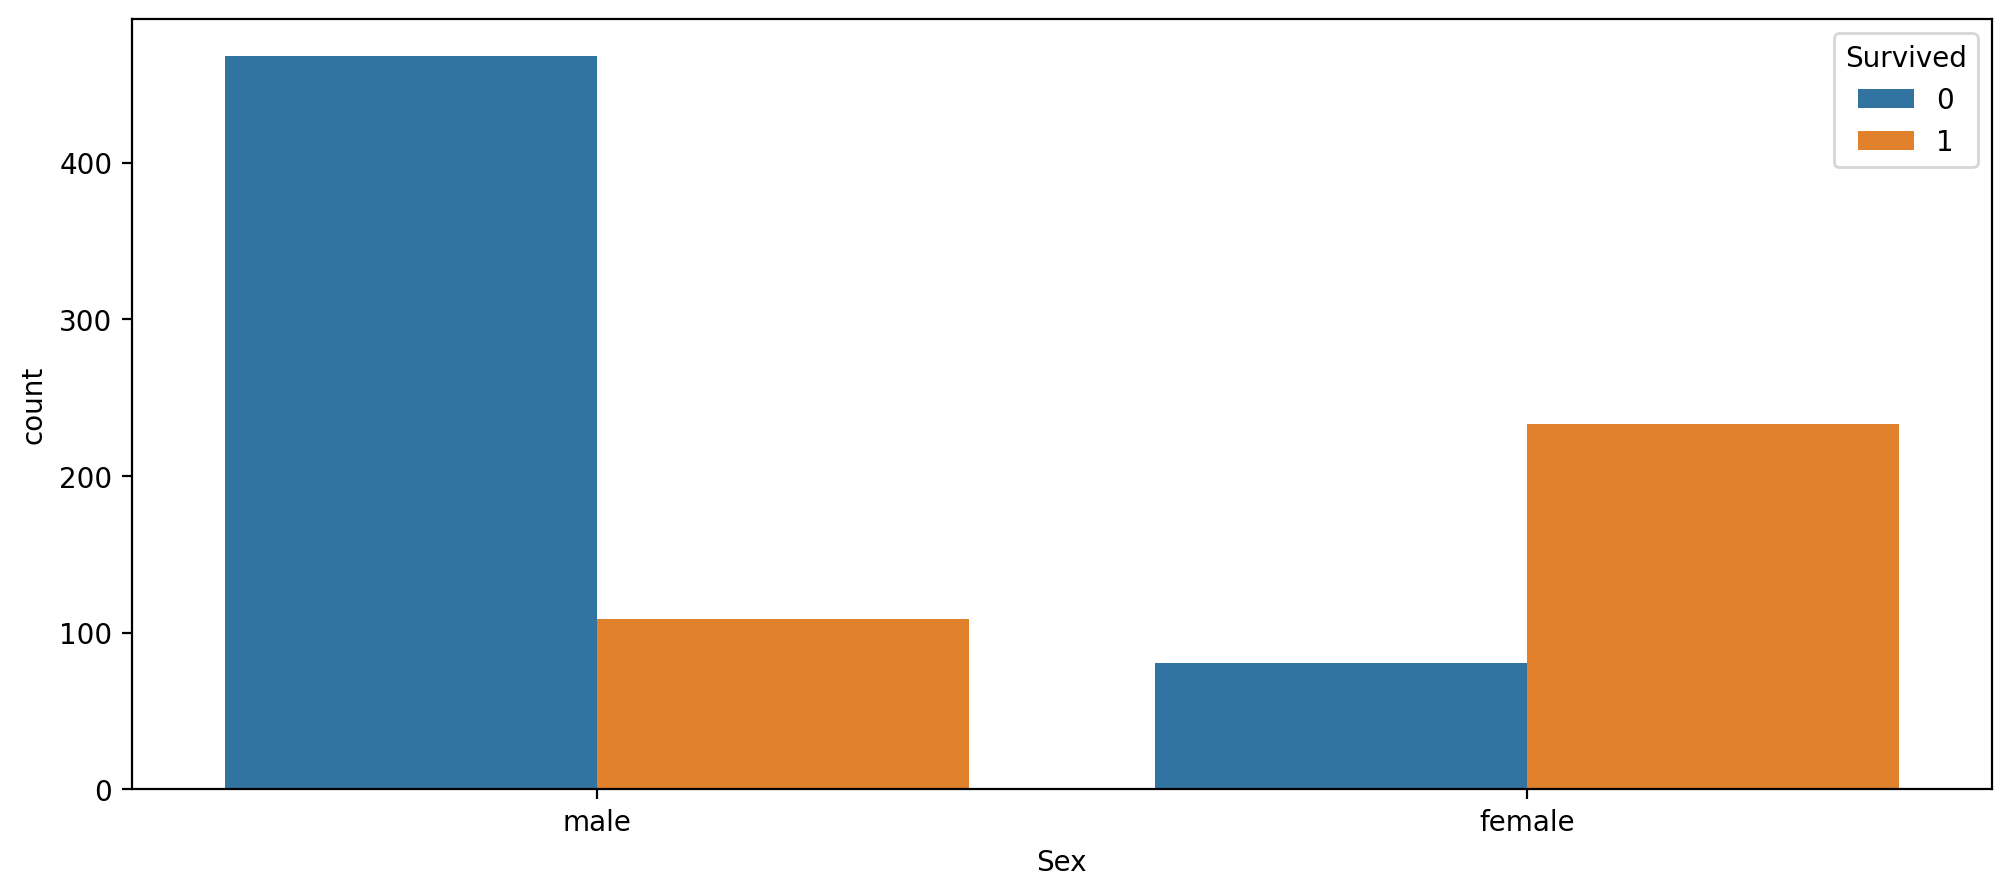

In [90]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Sex', hue = 'Survived', data = train)

<Axes: xlabel='Pclass', ylabel='count'>

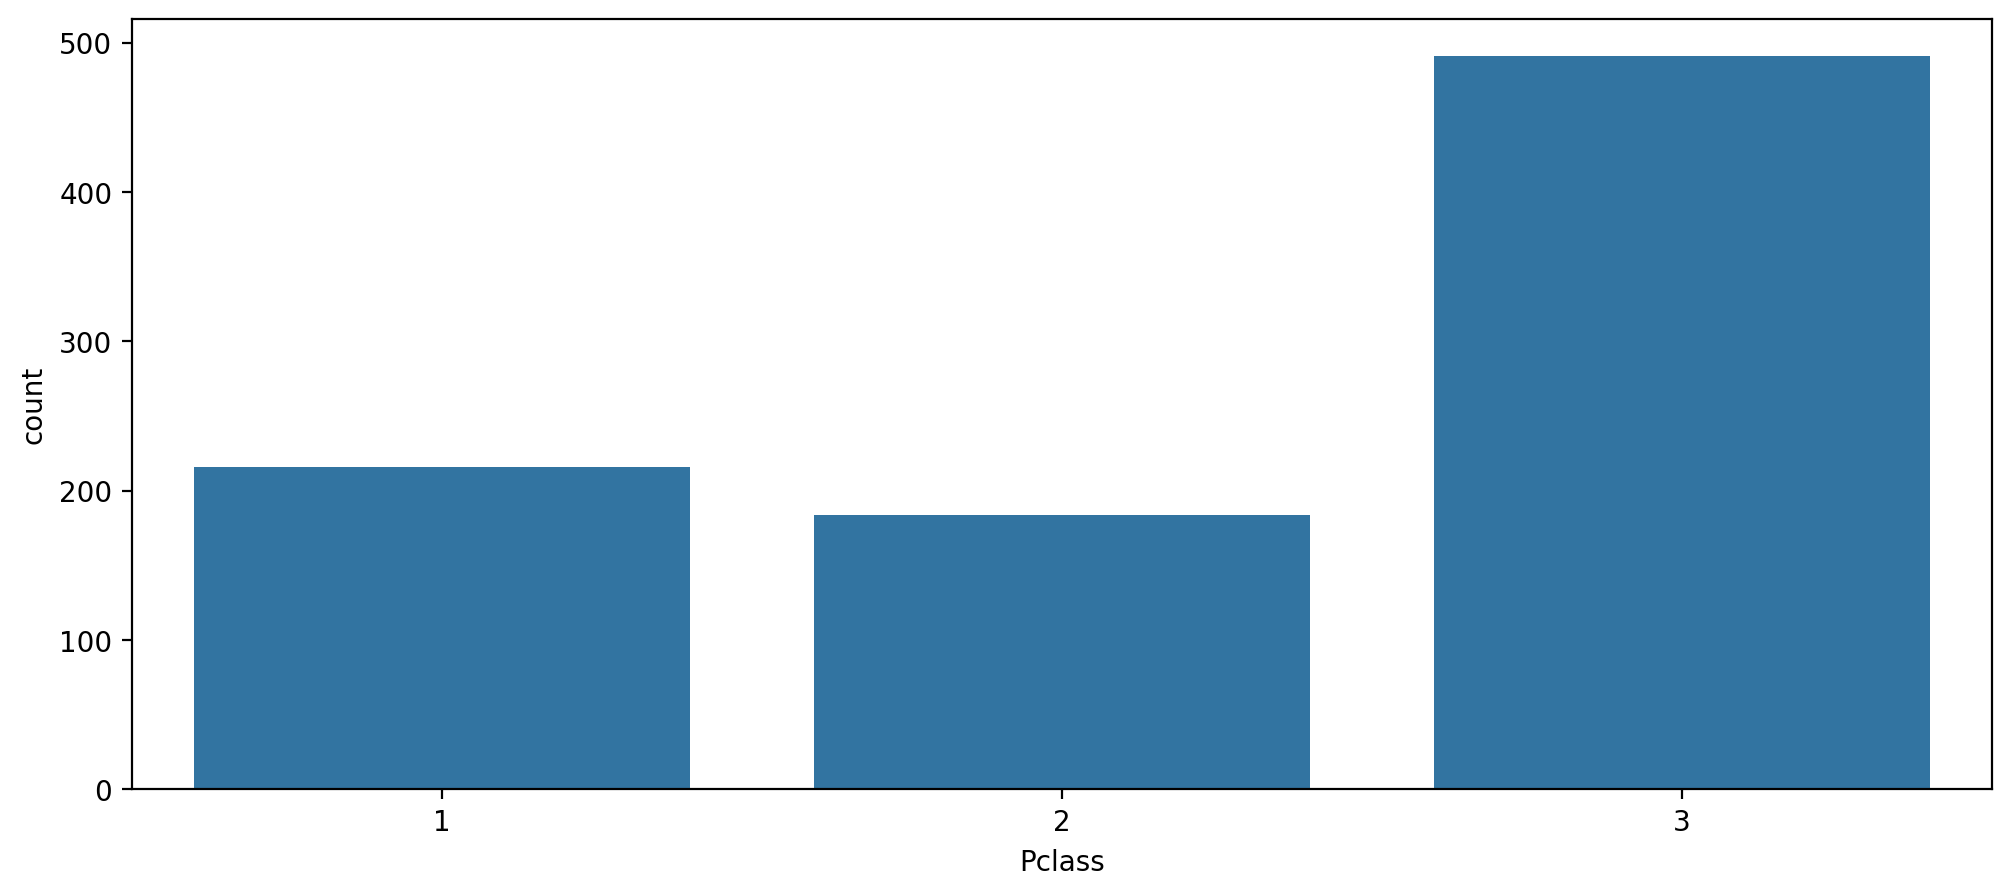

In [91]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot( x ='Pclass', data = train)

<Axes: xlabel='Pclass', ylabel='count'>

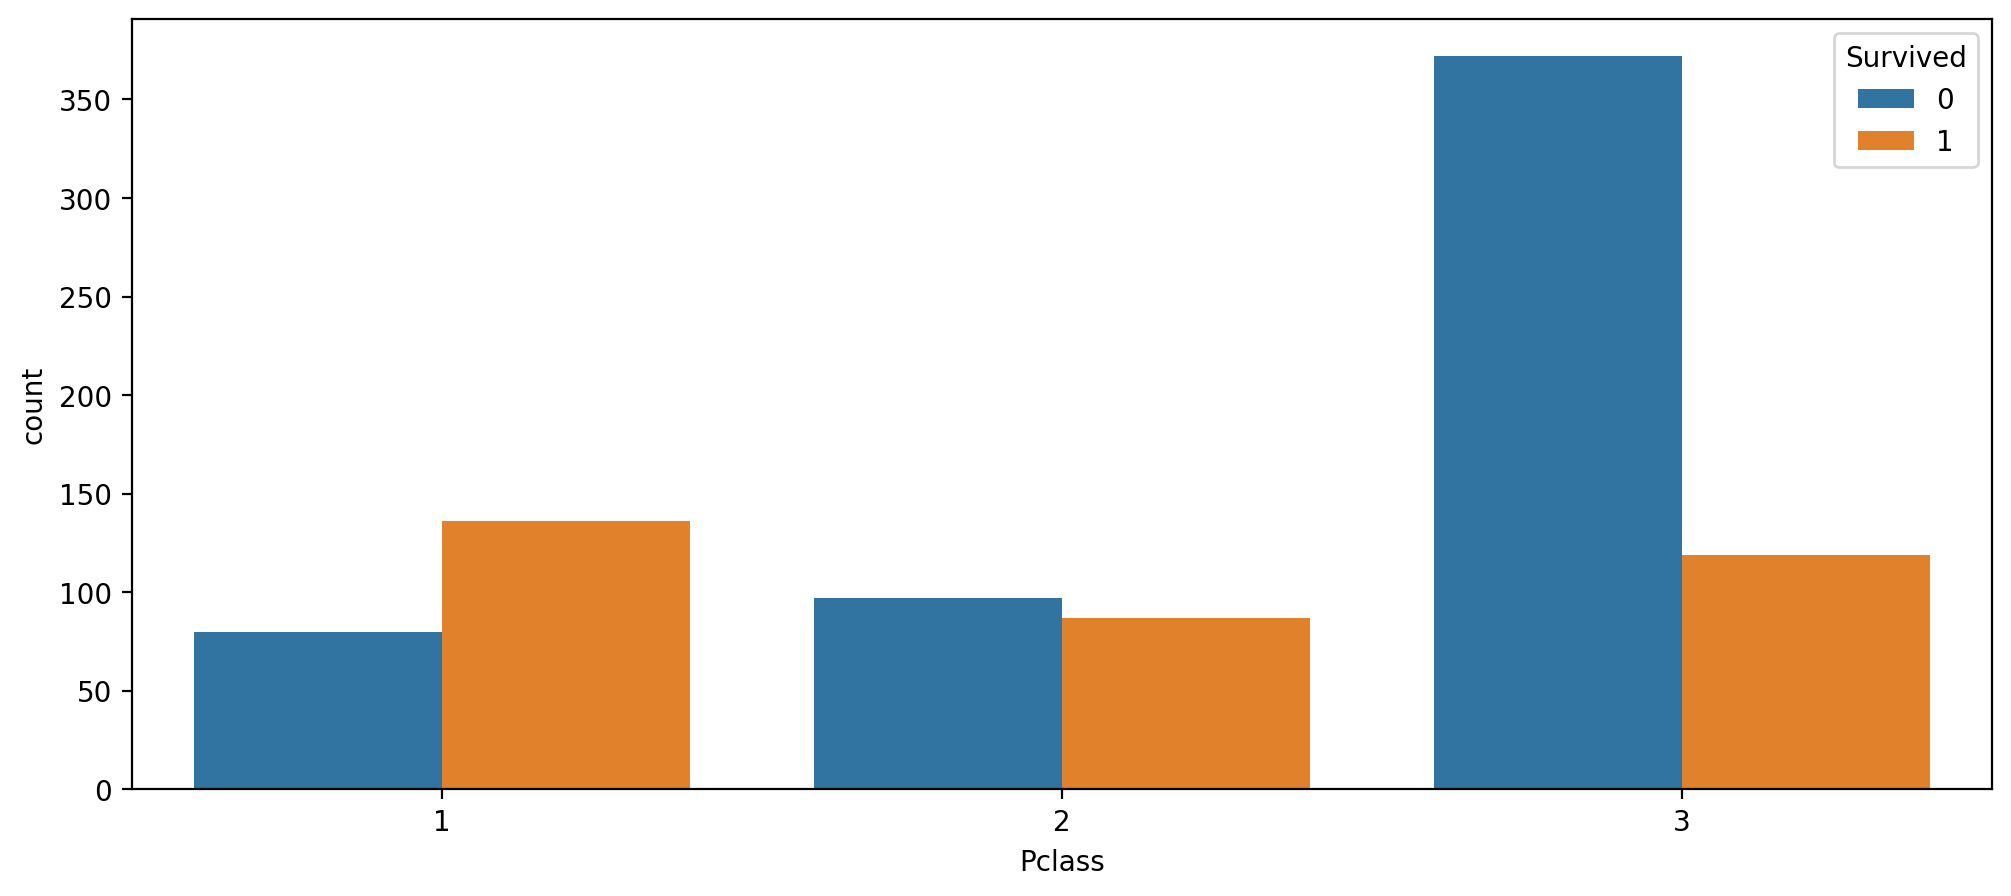

In [92]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)

In [135]:
mean_age_train = train['Age'].mean()
train['Age'].fillna(mean_age_train, inplace=True)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [136]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
train['Cabin'] = label_encoder.fit_transform(train['Cabin'].astype(str))
train['Pclass'] = label_encoder.fit_transform(train['Pclass'])
train['Embarked'] = label_encoder.fit_transform(train['Embarked'].astype(str))

In [137]:
X_train = train.drop(columns=['Survived', 'Name', 'Ticket'])
y_train = train['Survived']

In [139]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [140]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=40, batch_size=64, validation_split=0.2)


Epoch 1/40
12/12 [==============================] - 1s 12ms/step - loss: 0.6387 - accuracy: 0.7135 - val_loss: 0.5972 - val_accuracy: 0.7765
Epoch 2/40
12/12 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.7683 - val_loss: 0.5089 - val_accuracy: 0.8101
Epoch 3/40
12/12 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7992 - val_loss: 0.4532 - val_accuracy: 0.8101
Epoch 4/40
12/12 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.8020 - val_loss: 0.4191 - val_accuracy: 0.8045
Epoch 5/40
12/12 [==============================] - 0s 5ms/step - loss: 0.4526 - accuracy: 0.8006 - val_loss: 0.4135 - val_accuracy: 0.7989
Epoch 6/40
12/12 [==============================] - 0s 4ms/step - loss: 0.4429 - accuracy: 0.8048 - val_loss: 0.4002 - val_accuracy: 0.8101
Epoch 7/40
12/12 [==============================] - 0s 5ms/step - loss: 0.4360 - accuracy: 0.8048 - val_loss: 0.3871 - val_accuracy: 0.8212
Epoch 8/40
12/12 [=

In [141]:
mean_age_test = test['Age'].mean()
test['Age'].fillna(mean_age_test, inplace=True)
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [144]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
label_encoder_test = LabelEncoder()
test['Cabin'] = label_encoder_test.fit_transform(test['Cabin'].astype(str))
test['Pclass'] = label_encoder_test.fit_transform(test['Pclass'])
test['Embarked'] = label_encoder_test.fit_transform(test['Embarked'].astype(str))

In [145]:
X_test = test.drop(columns=['Name', 'Ticket'])
X_test_scaled = scaler.transform(X_test)

In [155]:
predictions_proba = model.predict(X_test_scaled[0:5])
predictions = (predictions_proba > 0.5).astype(int)

1/1 [==============================] - 0s 14ms/step


In [156]:
print("Predicted outcomes:")
print(predictions)

Predicted outcomes:
[[0]
 [1]
 [0]
 [0]
 [1]]
